# Soil Erosion Baseline LEAF Generation
Baseline soil erosion LEAF were developed for the same land use maps than SOC LEAFs. In this case, despite LEAF existing for both irrigated and rainfed land uses, there is no difference. LEAFs have been generated differentiating crop residue management practices, as well as **TODO: conventional and reduced tillage**.

As mentioned in the [Soil Erosion Documentation](../documentation/Soil_Erosion_Documentation.md), soil erosion LEAFs are generated using the RUSLE equation, which needs both soil and weather data ($R$, $K_{st}$, and $LS$), and crop and land management relaed ($C$ and $P$).

## Step 1 - RLSK Layer
A single layer is used to speed up the process, and has been generated as the simply multiplication of R$, $K_{st}$, and $LS$ rasters. 

Then, importing and familiarizing with the needed files...

In [31]:
# Modules
import sbtn_leaf.map_plotting as mp
import sbtn_leaf.map_calculations as mc
import polars as pl
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio

In [6]:
# Filepaths
k_fp = "../data/soil_erosion/GloSEM_v1.1/RUSLE_KFactor_v1.1_25km.tif"
ls_fp = "../data/soil_erosion/GloSEM_v1.1/RUSLE_LSFactor_v1.1_25km.tif"
r_fp = "../data/soil_erosion/GloSEM_v1.1/RUSLE_RFactor_v1.1_25km.tif"

In [7]:
mp.inspect_raster(k_fp)

File: ../data/soil_erosion/GloSEM_v1.1/RUSLE_KFactor_v1.1_25km.tif
Driver: GTiff
Width, Height: 1728, 673
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-180.0, bottom=-56.6229166666667, right=179.99999999999943, top=83.58541666666642)
Pixel Size: (0.208333333333333, 0.208333333333333)
No-data Value: -3.4028234663852886e+38

--- Raster Metadata ---
TIFFTAG_SOFTWARE: GDAL 3.8.1e (3080114) (4.6.0;1710;3.0.1;2.1.6;;0x10302;5.4.5;), PROJ 9.3.1 (EPSG.VERSION=v10.098;EPSG.DATE=2023-11-24;ESRI.VERSION=ArcGIS Pro 3.2;ESRI.DATE=2023-11-02;PROJ_DATA.VERSION=1.16;)
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 0.0046822563745081425
  Max Value: 0.05668995901942253
  Mean Value: 0.026686985045671463
  Standard Deviation: 0.007201943080872297
  Band Metadata:
    STATISTICS_MAXIMUM: 0.056689959019423
    STATISTICS_MEAN: 0.026686986377999
    STATISTICS_MINIMUM: 0.0046822563745081
    STATISTICS_SKIPFACTORX: 1
    STATISTICS_SKIPFACTORY: 1
    

Raster has 24,328 different values. Min: 0.00. Max: 0.06
Using quantiles
All positives route


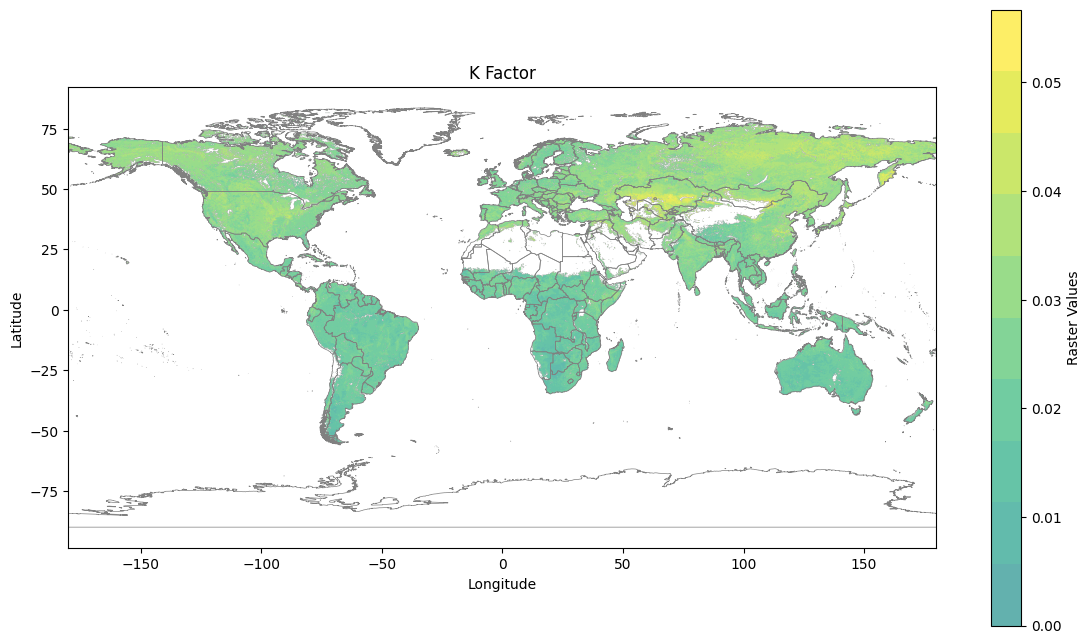

In [8]:
mp.plot_raster_on_world_extremes_cutoff(k_fp, "K Factor", alpha=0, quantiles=10)

Raster has 220,799 different values. Min: 0.15. Max: 38.19
Using quantiles
All positives route


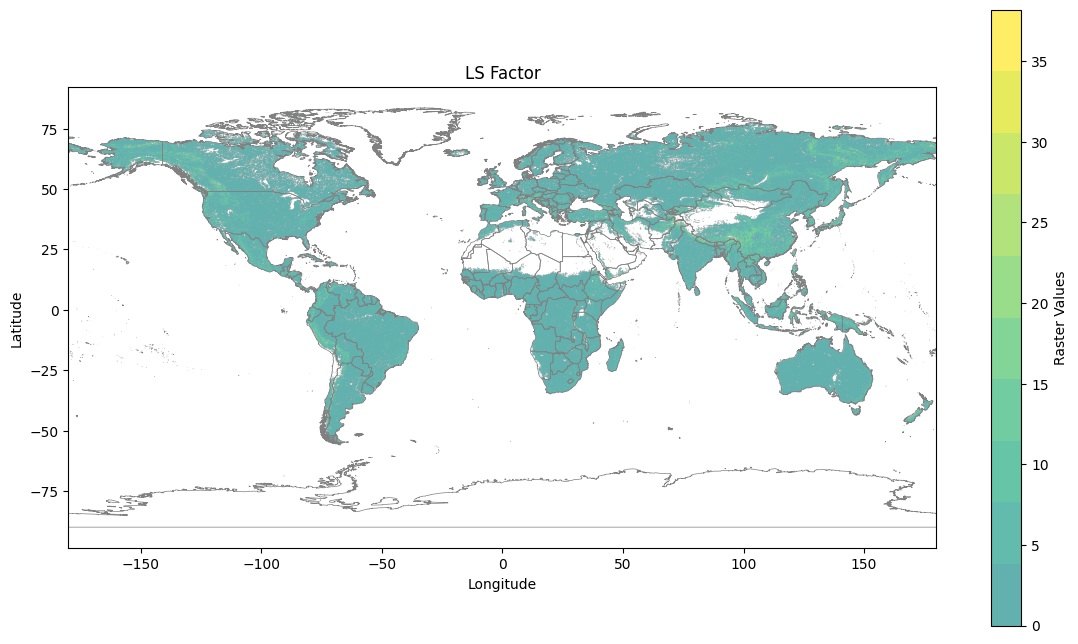

In [9]:
mp.plot_raster_on_world_extremes_cutoff(ls_fp, "LS Factor", alpha=0, quantiles=10)

Raster has 278,546 different values. Min: 0.00. Max: 26,179.59
Using quantiles
All positives route


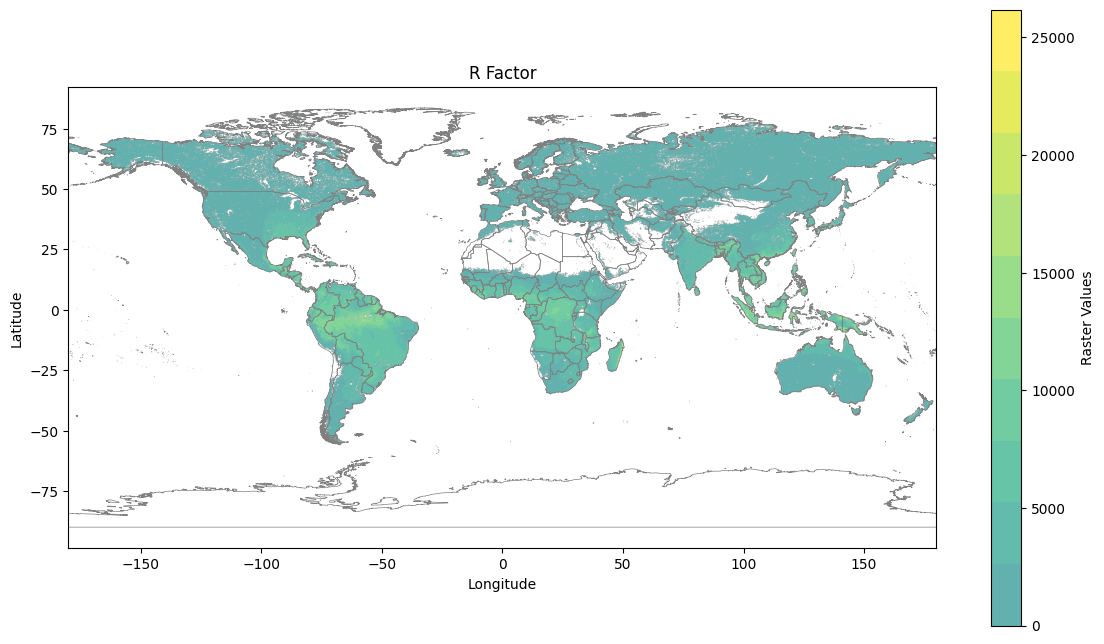

In [10]:
mp.plot_raster_on_world_extremes_cutoff(r_fp, "R Factor", alpha=0, quantiles=10)

In [11]:
mp.inspect_raster(ls_fp)

File: ../data/soil_erosion/GloSEM_v1.1/RUSLE_LSFactor_v1.1_25km.tif
Driver: GTiff
Width, Height: 1728, 673
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-180.0, bottom=-56.6229166666667, right=179.99999999999943, top=83.58541666666642)
Pixel Size: (0.208333333333333, 0.208333333333333)
No-data Value: -3.4028234663852886e+38

--- Raster Metadata ---
TIFFTAG_SOFTWARE: GDAL 3.8.1e (3080114) (4.6.0;1710;3.0.1;2.1.6;;0x10302;5.4.5;), PROJ 9.3.1 (EPSG.VERSION=v10.098;EPSG.DATE=2023-11-24;ESRI.VERSION=ArcGIS Pro 3.2;ESRI.DATE=2023-11-02;PROJ_DATA.VERSION=1.16;)
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 0.15429238975048065
  Max Value: 38.18529510498047
  Mean Value: 1.7793327569961548
  Standard Deviation: 3.262052059173584
  Band Metadata:
    STATISTICS_MAXIMUM: 38.18529510498
    STATISTICS_MEAN: 1.7793328181477
    STATISTICS_MINIMUM: 0.15429238975048
    STATISTICS_SKIPFACTORX: 1
    STATISTICS_SKIPFACTORY: 1
    STATISTICS_STDD

As expected from sourcing all layers from a single reference, they all coincide in their GIS properties and can be multiplied without further transformations.

In [68]:
# Defining raster list
rlsk_inputs = [r_fp, ls_fp, k_fp]
rlsk_fp = "../data/soil_erosion/rlsk_2012.tif"

rlsk = mc.multiply_rasters(rlsk_inputs, output_path=rlsk_fp)

NameError: name 'r_fp' is not defined

Inspecting the results...

In [13]:
mp.inspect_raster(rlsk_fp)

File: ../data/soil_erosion/rlsk_2012.tif
Driver: GTiff
Width, Height: 1728, 673
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-180.0, bottom=-56.6229166666667, right=179.99999999999943, top=83.58541666666642)
Pixel Size: (0.208333333333333, 0.208333333333333)
No-data Value: -1.7976931348623157e+308

--- Raster Metadata ---
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float64
  Min Value: 0.0
  Max Value: 10179.745188638457
  Mean Value: 96.62198062560604
  Standard Deviation: 294.14528533731226


Raster has 251,479 different values. Min: 1.15. Max: 455.20
Using quantiles
All positives route


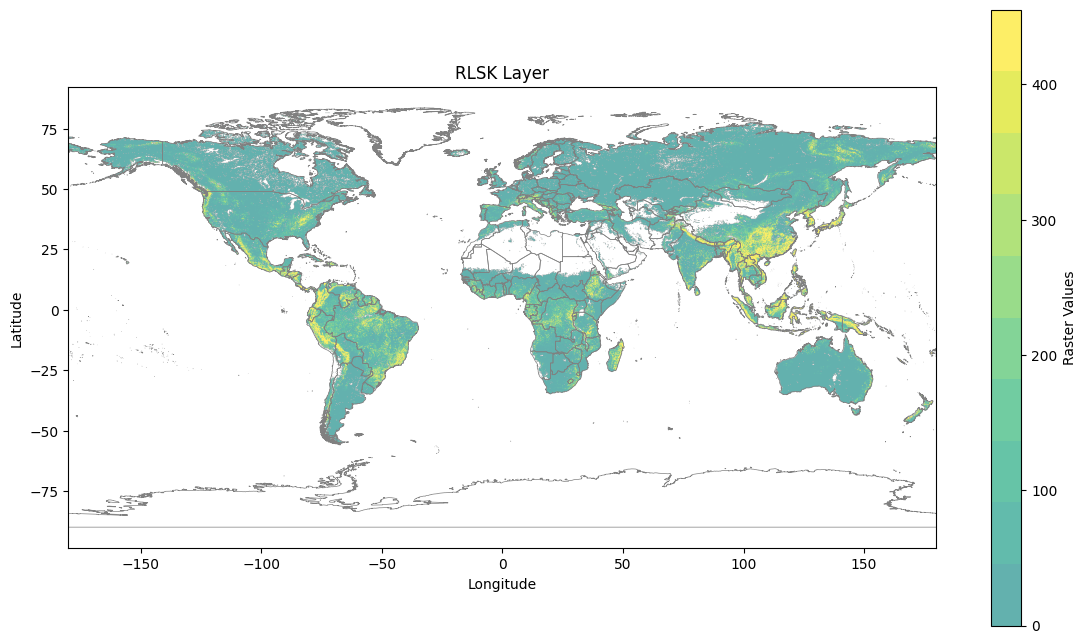

In [69]:
mp.plot_raster_on_world_extremes_cutoff("../data/soil_erosion/rlsk_2012.tif", title="RLSK Layer", alpha=5, quantiles=10)

Which shows that the layer has been correctly generated. Moving on.

## Step 2 - Crop C-Factor
Next step is generating a layer of C factors for each land use map. In this case, C-factors are assigned according to tables 1 and 2 of Soil Erosion Documentation, which have been pre-assigned and can be found on the file [`lu_c_factor_inventory`](../data/crops/lu_c_factor_inventory.xlsx). This file additionally contains all raster names, paths, commodities and their categorization, irrigation type, and crop residues management type.

Importing the file and inspecting the file

In [15]:
files_inventory = pl.read_excel("../data/crops/lu_c_factor_inventory.xlsx")

In [16]:
files_inventory.head()

file_name,land_use,path,crop_name,irrigation_type,on_off_field,crop_type,crop_subtype,c_crop,c_res,c_final
str,str,str,str,str,str,str,str,f64,f64,f64
"""lu_Broadleaf_Deciduous_Boreal_…","""Broadleaf_Deciduous_Boreal_dry""","""../data/land_use/lu_Broadleaf_…","""Broadleaf_Deciduous_Boreal_dry""","""NA""","""NA""","""Forest""","""Natural""",0.003,1.0,0.003
"""lu_Broadleaf_Deciduous_Boreal_…","""Broadleaf_Deciduous_Boreal_moi…","""../data/land_use/lu_Broadleaf_…","""Broadleaf_Deciduous_Boreal_moi…","""NA""","""NA""","""Forest""","""Natural""",0.003,1.0,0.003
"""lu_Broadleaf_Deciduous_Cold_te…","""Broadleaf_Deciduous_Cold_tempe…","""../data/land_use/lu_Broadleaf_…","""Broadleaf_Deciduous_Cold_tempe…","""NA""","""NA""","""Forest""","""Natural""",0.003,1.0,0.003
"""lu_Broadleaf_Deciduous_Cold_te…","""Broadleaf_Deciduous_Cold_tempe…","""../data/land_use/lu_Broadleaf_…","""Broadleaf_Deciduous_Cold_tempe…","""NA""","""NA""","""Forest""","""Natural""",0.003,1.0,0.003
"""lu_Broadleaf_Deciduous_Subtrop…","""Broadleaf_Deciduous_Subtropica…","""../data/land_use/lu_Broadleaf_…","""Broadleaf_Deciduous_Subtropica…","""NA""","""NA""","""Forest""","""Natural""",0.003,1.0,0.003


Next step is to generate the C-Factor value in the original land use raster resolution (~10km) and then downsampling to 25km from the RLSK layer. The 10km files have not been preserved, but can be generated as follow:

In [17]:
output_folder = "../data/soil_erosion/C_Factors/10km/"

In [18]:
output_folder = "../data/soil_erosion/C_Factors/10km/"

for row in files_inventory.iter_rows(named=True):
    input_path = row["path"]
    c_factor = row["c_final"]
    land_use_type = row["land_use"]
    output_path = output_folder + "cfactor_10km_" + land_use_type + ".tif"

    print(f"Rasterizing {land_use_type} land use with a c factor of {c_factor}")

    mc.create_binary_mask(input_path, output_path, binary_value=c_factor, src_nodata=255, dst_nodata=np.nan)
    print(f"{land_use_type} rasterized succesfully!\n")

Rasterizing Broadleaf_Deciduous_Boreal_dry land use with a c factor of 0.003
Input No Data defined as 255. Value 0.003 if is not 255 and nan if it is.
Broadleaf_Deciduous_Boreal_dry rasterized succesfully!

Rasterizing Broadleaf_Deciduous_Boreal_moist land use with a c factor of 0.003
Input No Data defined as 255. Value 0.003 if is not 255 and nan if it is.
Broadleaf_Deciduous_Boreal_moist rasterized succesfully!

Rasterizing Broadleaf_Deciduous_Cold_temperate_dry land use with a c factor of 0.003
Input No Data defined as 255. Value 0.003 if is not 255 and nan if it is.
Broadleaf_Deciduous_Cold_temperate_dry rasterized succesfully!

Rasterizing Broadleaf_Deciduous_Cold_temperate_moist land use with a c factor of 0.003
Input No Data defined as 255. Value 0.003 if is not 255 and nan if it is.
Broadleaf_Deciduous_Cold_temperate_moist rasterized succesfully!

Rasterizing Broadleaf_Deciduous_Subtropical land use with a c factor of 0.003
Input No Data defined as 255. Value 0.003 if is not 25

And the downsampling can be perform then as:

In [19]:
input_folder = "../data/soil_erosion/C_Factors/10km/"
output_folder = "../data/soil_erosion/C_Factors/25km/"

for file in os.listdir(input_folder):
    # file names
    file_name = os.path.basename(file)
    new_file_name = file_name.replace("10km", "25km")
    input_path = input_folder + file_name
    output_path = output_folder + new_file_name
    
    # Operation
    mc.resample_to_match(src_path=input_path, target_path=rlsk_fp, output_path=output_path)
    print(f"{file_name} resampled into rlsk raster resoltuion")
    

cfactor_10km_Broadleaf_Deciduous_Boreal_dry.tif resampled into rlsk raster resoltuion
cfactor_10km_Broadleaf_Deciduous_Boreal_moist.tif resampled into rlsk raster resoltuion
cfactor_10km_Broadleaf_Deciduous_Cold_temperate_dry.tif resampled into rlsk raster resoltuion
cfactor_10km_Broadleaf_Deciduous_Cold_temperate_moist.tif resampled into rlsk raster resoltuion
cfactor_10km_Broadleaf_Deciduous_Subtropical.tif resampled into rlsk raster resoltuion
cfactor_10km_Broadleaf_Deciduous_Tropical.tif resampled into rlsk raster resoltuion
cfactor_10km_Broadleaf_Deciduous_Warm_temperate_dry.tif resampled into rlsk raster resoltuion
cfactor_10km_Broadleaf_Deciduous_Warm_temperate_moist.tif resampled into rlsk raster resoltuion
cfactor_10km_Grassland.tif resampled into rlsk raster resoltuion
cfactor_10km_Irrigated_Apples.tif resampled into rlsk raster resoltuion
cfactor_10km_Irrigated_Bananas.tif resampled into rlsk raster resoltuion
cfactor_10km_Irrigated_Barley_residues_left_on_the_field.tif resa

Inpsecting wheat as it has both crop residues management options

In [20]:
mp.inspect_raster("../data/soil_erosion/C_Factors/25km/cfactor_25km_Rainfed_Wheat_residues_removed_from_the_field.tif")

File: ../data/soil_erosion/C_Factors/25km/cfactor_25km_Rainfed_Wheat_residues_removed_from_the_field.tif
Driver: GTiff
Width, Height: 1728, 673
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-180.0, bottom=-56.6229166666667, right=179.99999999999943, top=83.58541666666642)
Pixel Size: (0.208333333333333, 0.208333333333333)
No-data Value: nan

--- Raster Metadata ---
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 0.20000000298023224
  Max Value: 0.20000000298023224
  Mean Value: 0.20000001788139343
  Standard Deviation: 1.4901161193847656e-08


Raster has 1 different values. Min: 0.20. Max: 0.20


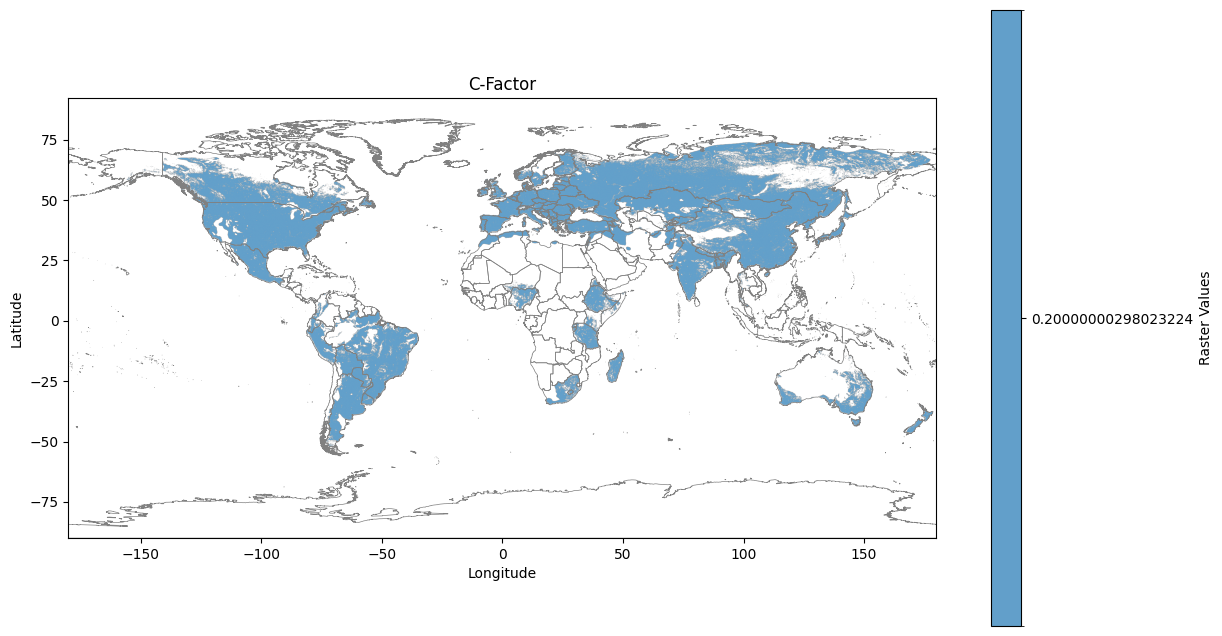

In [21]:
mp.plot_raster_on_world_extremes_cutoff("../data/soil_erosion/C_Factors/10km/cfactor_10km_Rainfed_Wheat_residues_removed_from_the_field.tif", "C-Factor", alpha=0)

In [22]:
mp.inspect_raster("../data/soil_erosion/C_Factors/25km/cfactor_25km_Rainfed_Wheat_residues_left_on_the_field.tif")

File: ../data/soil_erosion/C_Factors/25km/cfactor_25km_Rainfed_Wheat_residues_left_on_the_field.tif
Driver: GTiff
Width, Height: 1728, 673
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-180.0, bottom=-56.6229166666667, right=179.99999999999943, top=83.58541666666642)
Pixel Size: (0.208333333333333, 0.208333333333333)
No-data Value: nan

--- Raster Metadata ---
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 0.17599999904632568
  Max Value: 0.17599999904632568
  Mean Value: 0.17599999904632568
  Standard Deviation: 0.0


Raster has 1 different values. Min: 0.18. Max: 0.18


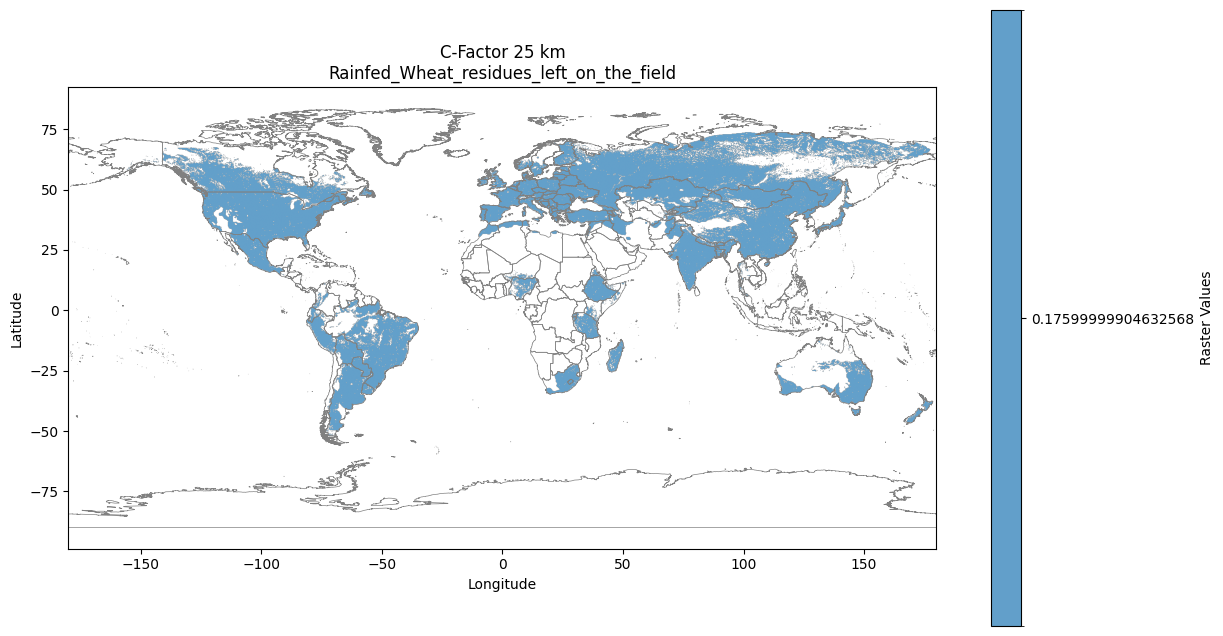

In [23]:
mp.plot_raster_on_world_extremes_cutoff("../data/soil_erosion/C_Factors/25km/cfactor_25km_Rainfed_Wheat_residues_left_on_the_field.tif", "C-Factor 25 km\nRainfed_Wheat_residues_left_on_the_field", alpha=0)

### TODO - Tillage

## Step 3 - Calculate LEAFs Soil Erosion for each land use
Now that both the RLSK layer and the C-Factor layers have been generated, soil erosion factors can be simply calculated as the multiplication of both. 

This can be done as:

In [24]:
input_folder = "../data/soil_erosion/C_Factors/25km/"
output_folder = "../LEAFs/soil_erosion/"

for file in os.listdir(input_folder):
    # file names
    file_name = os.path.basename(file)
    new_file_name = file_name.replace("cfactor", "se_rate")
    input_path = input_folder + file_name
    output_path = output_folder + new_file_name
    
    # Operation
    mc.multiply_rasters([rlsk_fp, input_path], output_path)
    print(f"Soil erosion calculated for {file_name}")

Raster saved into ../LEAFs/soil_erosion/se_rate_25km_Broadleaf_Deciduous_Boreal_dry.tif
Soil erosion calculated for cfactor_25km_Broadleaf_Deciduous_Boreal_dry.tif
Raster saved into ../LEAFs/soil_erosion/se_rate_25km_Broadleaf_Deciduous_Boreal_moist.tif
Soil erosion calculated for cfactor_25km_Broadleaf_Deciduous_Boreal_moist.tif
Raster saved into ../LEAFs/soil_erosion/se_rate_25km_Broadleaf_Deciduous_Cold_temperate_dry.tif
Soil erosion calculated for cfactor_25km_Broadleaf_Deciduous_Cold_temperate_dry.tif
Raster saved into ../LEAFs/soil_erosion/se_rate_25km_Broadleaf_Deciduous_Cold_temperate_moist.tif
Soil erosion calculated for cfactor_25km_Broadleaf_Deciduous_Cold_temperate_moist.tif
Raster saved into ../LEAFs/soil_erosion/se_rate_25km_Broadleaf_Deciduous_Subtropical.tif
Soil erosion calculated for cfactor_25km_Broadleaf_Deciduous_Subtropical.tif
Raster saved into ../LEAFs/soil_erosion/se_rate_25km_Broadleaf_Deciduous_Tropical.tif
Soil erosion calculated for cfactor_25km_Broadleaf_D

Inpsecting the same land use as before...

In [25]:
wheat_ron_se_leaf_fp = "../LEAFs/soil_erosion/raster/se_rate_25km_Rainfed_Wheat_residues_left_on_the_field.tif"
wheat_roff_se_leaf_fp = "../LEAFs/soil_erosion/raster/se_rate_25km_Rainfed_Wheat_residues_removed_from_the_field.tif"

Raster has 160,954 different values. Min: 0.00. Max: 2,035.95
Using quantiles
All positives route


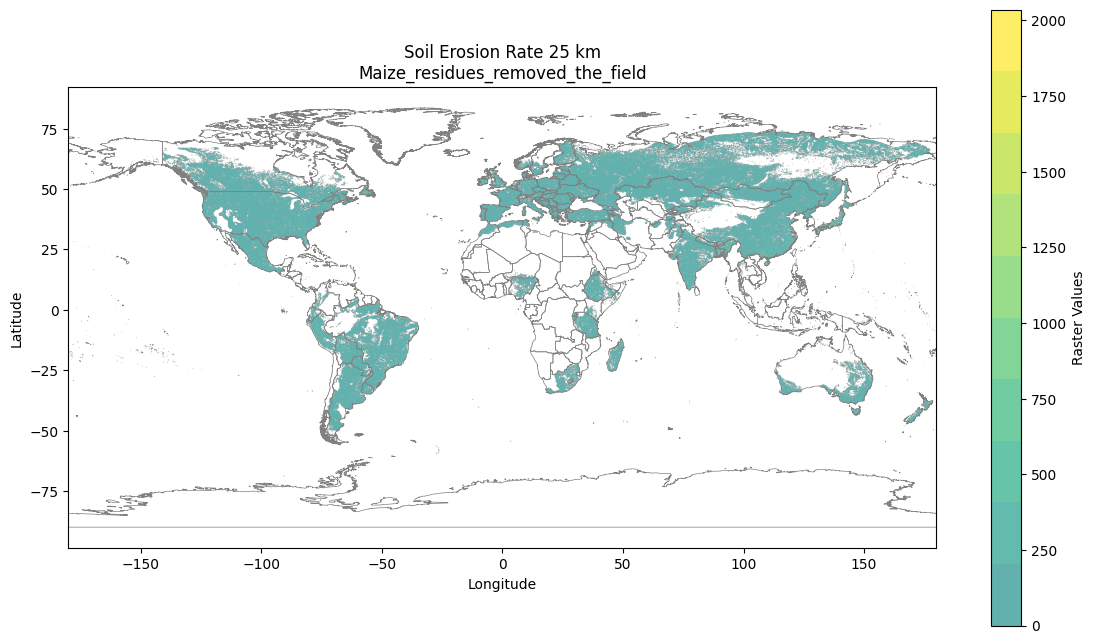

In [26]:
mp.plot_raster_on_world_extremes_cutoff(wheat_roff_se_leaf_fp, "Soil Erosion Rate 25 km\nMaize_residues_removed_the_field", alpha=0, quantiles=10)

Raster has 163,964 different values. Min: 0.00. Max: 1,791.64
Using quantiles
All positives route


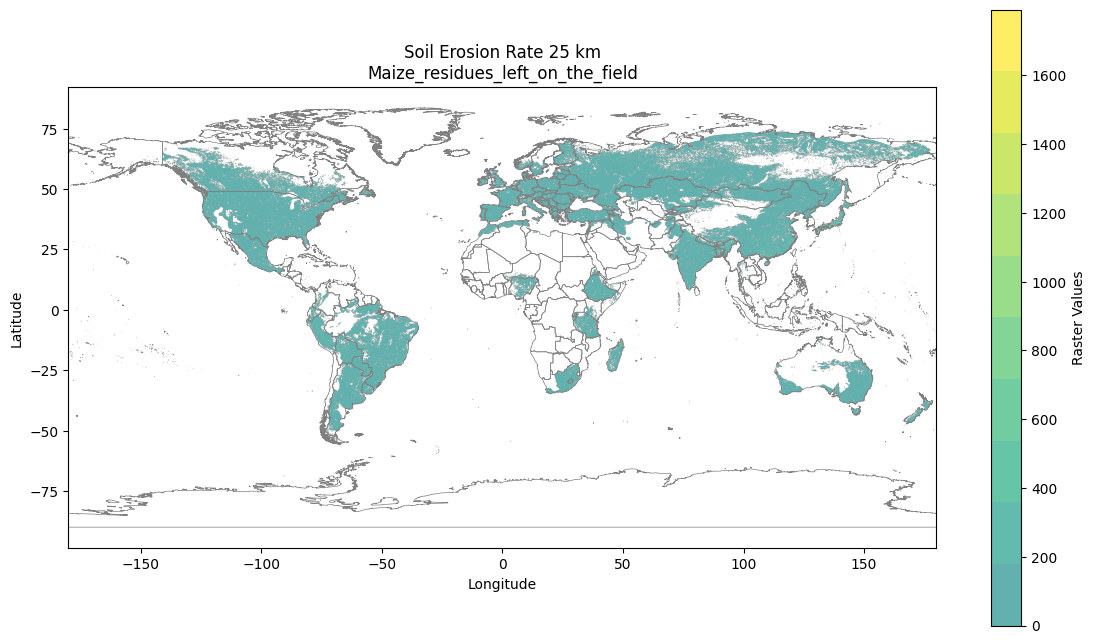

In [27]:
mp.plot_raster_on_world_extremes_cutoff(wheat_ron_se_leaf_fp, "Soil Erosion Rate 25 km\nMaize_residues_left_on_the_field", alpha=0, quantiles=10)

As it can be seen, there seems to be some outliers, with same erosionr rates going over 1,000 ton soil per year. Plotting with a 95% range of values:

Raster has 145,218 different values. Min: 0.24. Max: 86.62
Using quantiles
All positives route


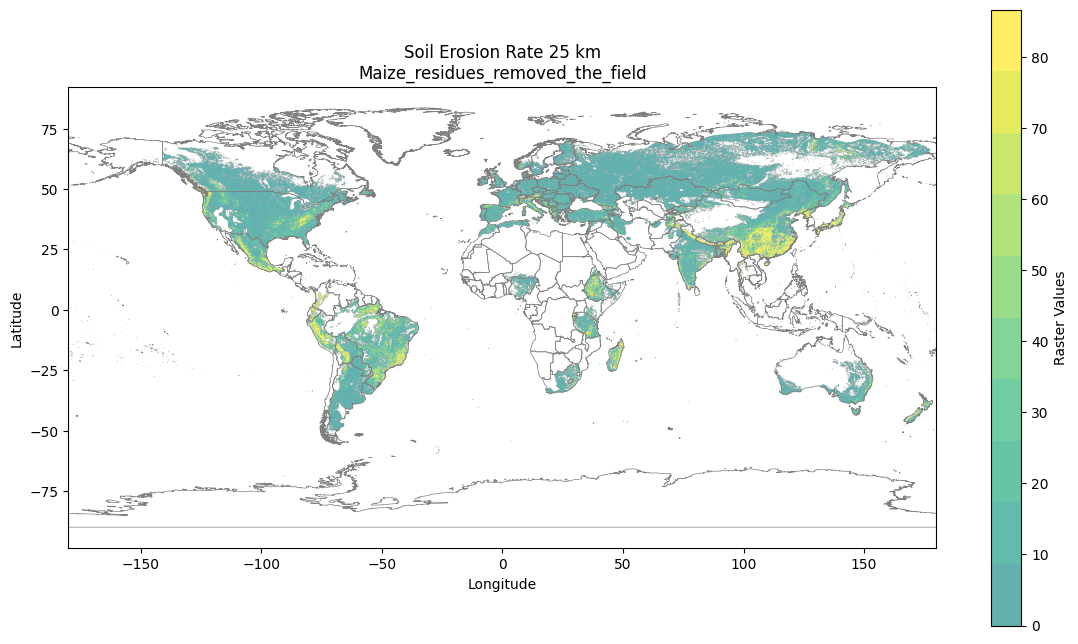

In [28]:
mp.plot_raster_on_world_extremes_cutoff(wheat_roff_se_leaf_fp, "Soil Erosion Rate 25 km\nMaize_residues_removed_the_field", alpha=5, quantiles=10)

Raster has 147,926 different values. Min: 0.21. Max: 76.11
Using quantiles
All positives route


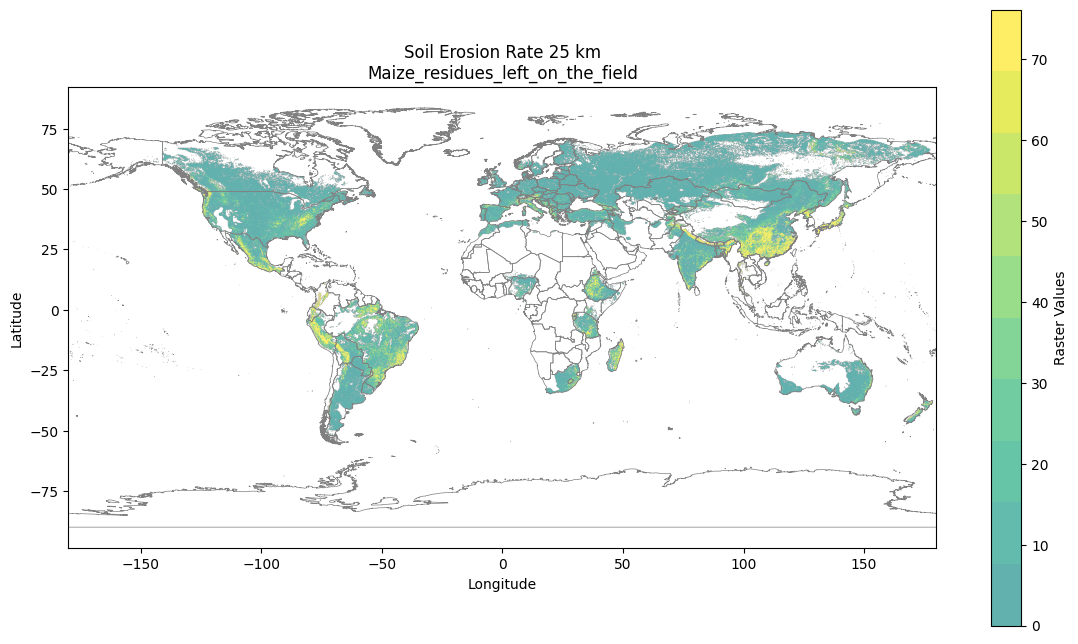

In [29]:
mp.plot_raster_on_world_extremes_cutoff(wheat_ron_se_leaf_fp, "Soil Erosion Rate 25 km\nMaize_residues_left_on_the_field", alpha=5, quantiles=10)

It shows a much more sensible map. It also shows that the maximum rates for leaving residues on the field erosion rates are lower, as expected.

## Step 4 - Country, Sub-country, and Ecoregion averages
After calculating a LEAF soil erosion raster for each land use, it's time to calculate averages per country, sub-country, and ecoregions. These are calculated as area-weighted ones. 

### Step 4.1 - Outliers filtering
Before proceeding to calculate averages per polygon, calculated erosion rates should be analyzed to defined the best way to deal with potential outliers.

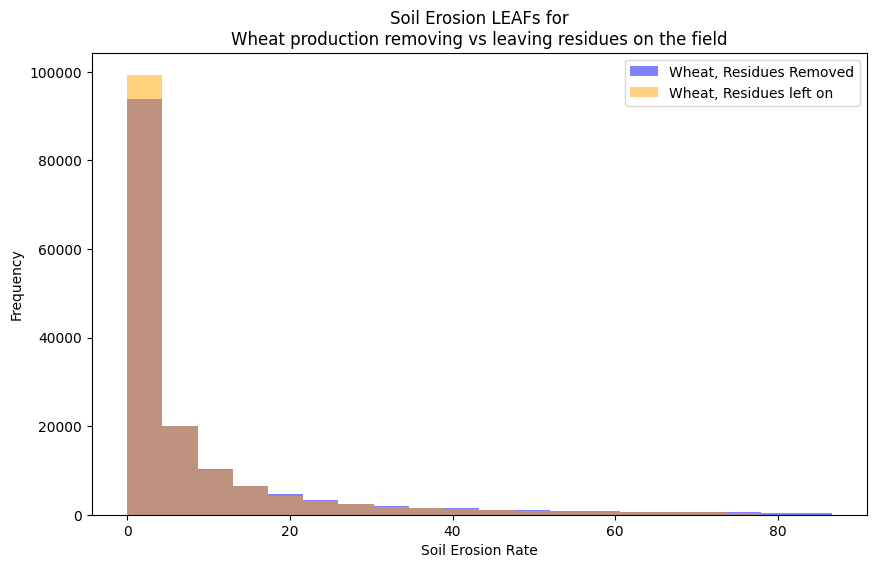

In [56]:
mp.plot_overlapping_histograms(
    raster1_path=wheat_roff_se_leaf_fp,
    raster2_path=wheat_ron_se_leaf_fp,
    title="Soil Erosion LEAFs for\nWheat production removing vs leaving residues on the field",
    x_label="Soil Erosion Rate",
    label1="Wheat, Residues Removed",
    label2="Wheat, Residues left on",
    bins = 20,
    quantiles_tails='right',
    filter_quantiles=0.05
)

In [44]:
with rasterio.open(wheat_roff_se_leaf_fp) as src:
    data = src.read(1, masked=True)

data_flat = data.compressed()

Now transforming with $data_t = \log(1+data)$. As this preserves 0 values (log(1) = 0)

In [45]:
data_t = np.log1p(data_flat)

This looks better distributed

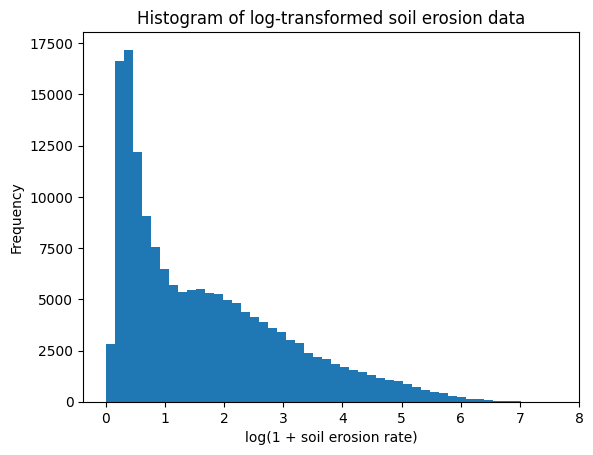

In [46]:
plt.hist(data_t[~np.isnan(data_t)], bins=50)
plt.title("Histogram of log-transformed soil erosion data")
plt.xlabel("log(1 + soil erosion rate)")
plt.ylabel("Frequency")
plt.show()

Now calculating mean and dev of the logtransformed data

In [47]:
mean_dt = np.nanmean(data_t)
std_dt = np.nanstd(data_t)

print(f'Log transformed stats: mean: {mean_dt}, std: {std_dt}')

Log transformed stats: mean: 1.678990030025431, std: 1.3798155592670553


Now filtering the data on mean + 3*std

In [41]:
data_t_f = data_t[data_t <= (mean_dt+3*std_dt)]

Checking how it looks...

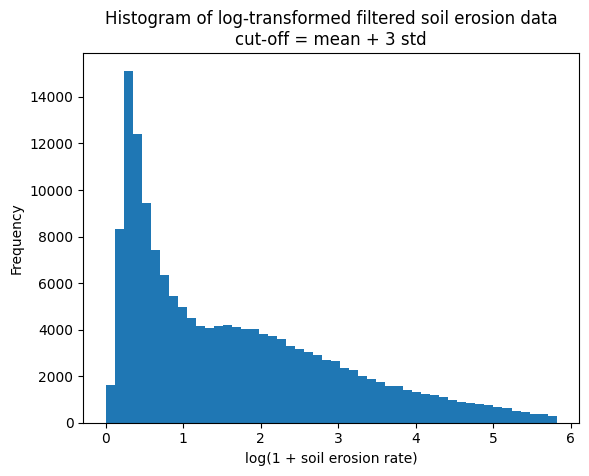

In [49]:
plt.hist(data_t_f[~np.isnan(data_t_f)], bins=50)
plt.title("Histogram of log-transformed filtered soil erosion data\ncut-off = mean + 3 std")
plt.xlabel("log(1 + soil erosion rate)")
plt.ylabel("Frequency")
plt.show()

Which basically cuts the tail close to 6 and over

Un-transforming the data

In [51]:
data_f = np.exp(data_t_f) - 1

Finally comparing mean and std of both:

In [53]:
# Original data
mean_d = np.nanmean(data_flat)
std_d = np.nanstd(data_flat)

# Filtered data
mean_d_f = np.nanmean(data_f)
std_d_f = np.nanstd(data_f)

# Printing
print(f'Unfiltered values - Mean {mean_d} | Std {std_d}')
print(f'Filtered values - Mean {mean_d_f} | Std {std_d_f}')


Unfiltered values - Mean 18.016991082418958 | Std 53.33236638705852
Filtered values - Mean 15.269619829926823 | Std 36.64694849008393


Now comparing how both distribution look.

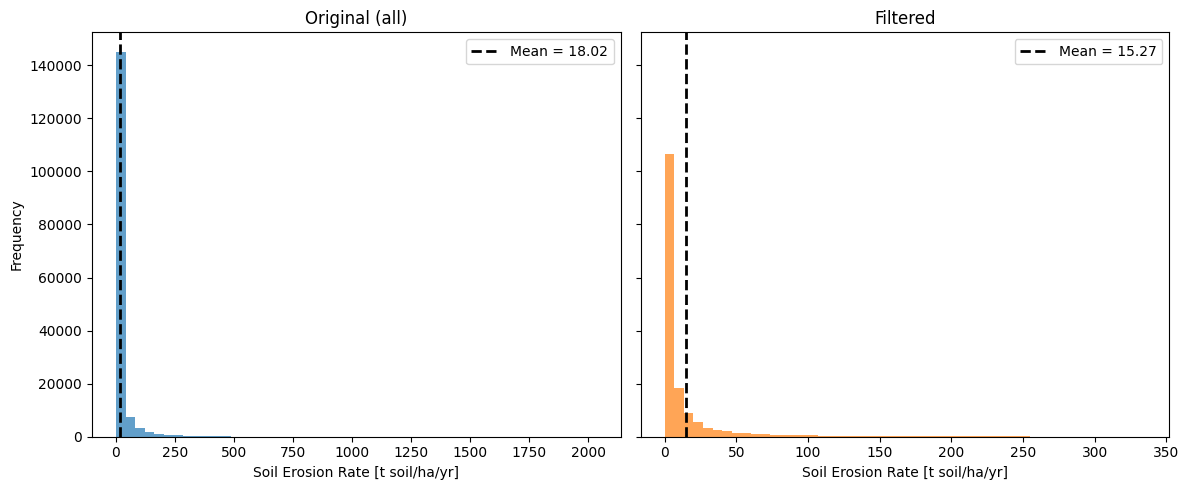

In [59]:
# Side-by-side histograms with vertical mean lines

# Clean original array
if np.ma.is_masked(orig):
    orig_clean = orig.compressed()
else:
    orig_clean = orig[~np.isnan(orig)]

# Clean filtered array
if np.ma.is_masked(filt):
    filt_clean = filt.compressed()
else:
    filt_clean = filt[~np.isnan(filt)]

# Guard
if orig_clean.size == 0 or filt_clean.size == 0:
    raise ValueError("One of the arrays to plot is empty after cleaning NaNs/masks.")

mean_orig = np.nanmean(orig_clean)
mean_filt = np.nanmean(filt_clean)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

bins = 50
axes[0].hist(orig_clean, bins=bins, color=colors[0], alpha=0.7)
axes[0].axvline(mean_orig, color='k', linestyle='--', linewidth=2, label=f"Mean = {mean_orig:.2f}")
axes[0].set_title("Original (all)")
axes[0].set_xlabel("Soil Erosion Rate [t soil/ha/yr]")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].hist(filt_clean, bins=bins, color=colors[1], alpha=0.7)
axes[1].axvline(mean_filt, color='k', linestyle='--', linewidth=2, label=f"Mean = {mean_filt:.2f}")
axes[1].set_title("Filtered")
axes[1].set_xlabel("Soil Erosion Rate [t soil/ha/yr]")
axes[1].legend()

plt.tight_layout()
plt.show()


Which still shows a heavily skewed disitribution, but eliminating the extremely high values over 350 ton soil/ha/year

### Step 4.2 - LEAFs averages

Now that this has been identified, average per geometry are calculated eliminating this outliers

In [4]:
# Defining needed inputs
country_shp = gpd.read_file("../data/CountryLayers/Country_Level0/g2015_2014_0.shp")
master_key = "ADM0_NAME"

Checking to see if there are duplicated rows...

In [9]:
# Prepare master_gdf if it has several repeated rows
repated_master_key_rows = country_shp[master_key][country_shp[master_key].duplicated()].unique()
repated_master_key_amount = repated_master_key_rows.shape[0]
print(f"There are {repated_master_key_amount} repeated rows, which are:\n {repated_master_key_rows}")

if repated_master_key_amount > 0:
    print('Eliminating duplicat rows')
    corrected_shp = mc.prep_master_unique(country_shp, "ADM0_NAME", strategy="dissolve")

There are 1 repeated rows, which are:
 ['West Bank']
Eliminating duplicat rows


Saving it as it takes a long time...

In [ ]:
# corrected_shp.to_file('../data/CountryLayers/Country_Level0/g2015_2014_0_dissolved.shp')

In [2]:
corrected_shp = gpd.read_file('../data/CountryLayers/Country_Level0/g2015_2014_0_dissolved.shp')

Now running the function. Considering soil erosion rates distribution, we'll use the same outliers filtering method as previously shown.

In [10]:
gpkg_path, df_results = mc.build_cfs_gpkg_from_rasters(
    input_folder = "../LEAFs/soil_erosion/raster/",
    output_folder = "../LEAFs/soil_erosion/country/",
    layer_name="se_leaf_country",
    master_gdf=corrected_shp,   # e.g., countries, subcountries, or ecoregions
    master_key="ADM0_NAME",            # or 'ISO_A3', 'ADM1_NAME', 'ECO_NAME'
    result_key="country",              # must match the column emitted by your calc gdf
    input_raster_key="se_rate_25km_",
    cf_name="soil_erosion",
    cf_unit="t soil/ha/yr",
    area_type="country",
    calc_kwargs=dict(outlier_method="log1p_win"),  # Replaces all values above a threshold by the threhsold
    reset_gpkg=True,
    promote_to_multi=True,
    add_provenance=True,
    # run_test=True                             # Use run test to run the first 3 files
)

print(f"Wrote {df_results.shape[0]} rows into {gpkg_path}")

2025-10-15 14:10:54,652 - INFO - Building 'se_leaf_country' from rasters in ../LEAFs/soil_erosion/raster/ into ../LEAFs/soil_erosion/country/ (../LEAFs/soil_erosion/country/soil_erosion_country.gpkg)

2025-10-15 14:11:07,436 - INFO - Starting: Calculating country weighted CF for Broadleaf_Deciduous_Boreal_dry using outlier filtering method log1p_win
2025-10-15 14:12:12,484 - INFO - Calculations complete for ../LEAFs/soil_erosion/raster/se_rate_25km_Broadleaf_Deciduous_Boreal_dry.tif! Found matches for 8 regions.

2025-10-15 14:12:12,604 - INFO - Starting: Calculating country weighted CF for Broadleaf_Deciduous_Boreal_moist using outlier filtering method log1p_win
2025-10-15 14:13:12,014 - INFO - Calculations complete for ../LEAFs/soil_erosion/raster/se_rate_25km_Broadleaf_Deciduous_Boreal_moist.tif! Found matches for 8 regions.

2025-10-15 14:13:12,161 - INFO - Starting: Calculating country weighted CF for Broadleaf_Deciduous_Cold_temperate_dry using outlier filtering method log1p_win


Wrote 66240 rows into ../LEAFs/soil_erosion/country/soil_erosion_country.gpkg


Checking outputs

In [12]:
gdf_test_values = gpd.read_file(gpkg_path, layer="se_leaf_country")
gdf_test_values.sort_values(by=["cf"]).head()

,ADM0_NAME,flow_name,cf,cf_median,cf_std,_source_file
12674,Turkmenistan,Needleleaf_Evergreen_Cold_temperate_moist,0.0000,0.0000,0.0000,se_rate_25km_Needleleaf_Evergreen_Cold_tempera...
12685,Uzbekistan,Needleleaf_Evergreen_Cold_temperate_moist,0.0001,0.0000,0.0001,se_rate_25km_Needleleaf_Evergreen_Cold_tempera...
12598,Netherlands,Needleleaf_Evergreen_Cold_temperate_moist,0.0002,0.0002,0.0001,se_rate_25km_Needleleaf_Evergreen_Cold_tempera...
12787,Gaza Strip,Needleleaf_Evergreen_Subtropical,0.0002,0.0002,0.0000,se_rate_25km_Needleleaf_Evergreen_Subtropical.tif
12553,Kazakhstan,Needleleaf_Evergreen_Cold_temperate_moist,0.0002,0.0002,0.0003,se_rate_25km_Needleleaf_Evergreen_Cold_tempera...


And it can be seen that the output has all values. Opening the dataset it can be seen it include NaNs.

To plot it, the geoemtries layer need to be imported as:

In [13]:
gdf_test_geometries = gpd.read_file(gpkg_path, layer="geometry_layer")

And then merged.

In [14]:
gdf_test = gdf_test_geometries.merge(gdf_test_values.drop(columns="_source_file"), how="left", on="ADM0_NAME")

Plotting, using Broadleaf_Deciduous_Cold_temperate_dry as example

In [15]:
wheat_rainfed_roff = gdf_test[gdf_test["flow_name"]=="Rainfed_Wheat_residues_removed_from_the_field"]

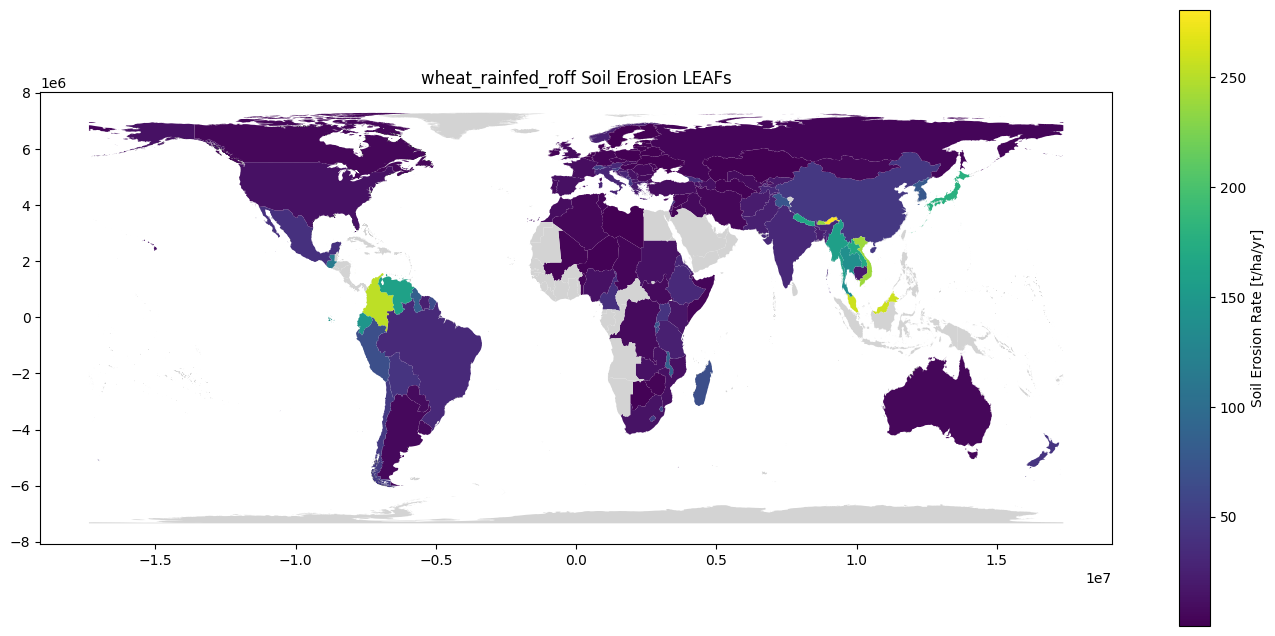

In [16]:
fig, ax = plt.subplots(figsize=(14, 8)) 
wheat_rainfed_roff.plot(column="cf", ax=ax, cmap="viridis", 
           legend=True, 
           legend_kwds={"label": "Soil Erosion Rate [t/ha/yr]", "shrink": 0.8}, 
           missing_kwds={"color": "lightgrey", "label": "No value"}) 

ax.set_title("wheat_rainfed_roff Soil Erosion LEAFs")
plt.tight_layout() 
plt.show()

Checking df

In [21]:
df_results.sort_values(by="value", ascending=False).head()

,ADM0_NAME,value,metric,flow_name
65746,Comoros,1881.906965,cf_median,Urban
65470,Comoros,1881.906965,cf_mean,Urban
65592,New Caledonia,1509.368941,cf_mean,Urban
65654,Taiwan,1393.241503,cf_mean,Urban
65426,Arunachal Pradesh,1324.491573,cf_mean,Urban


It can be seen that holds the same information

##### Sub-Country
Repeating the process with subcountries

First, correcting the shapefile to eliminate duplicated names, if any

In [4]:
# Defining needed inputs
subcountry_shp = gpd.read_file("../data/CountryLayers/SubCountry_Level1/g2015_2014_1.shp")
master_key = "ADM1_CODE"

In [26]:
# Prepare master_gdf if it has several repeated rows
repated_master_key_rows = subcountry_shp[master_key][subcountry_shp[master_key].duplicated()].unique()
repated_master_key_amount = repated_master_key_rows.shape[0]
print(f"There are {repated_master_key_amount} repeated rows, which are:\n {repated_master_key_rows}")

There are 0 repeated rows, which are:
 []


So there are now repeated sub-country geom IDs, so we'll go ahead and do the calculations based on that

Running the code

In [53]:
gpkg_path_sc, df_results_sc = mc.build_cfs_gpkg_from_rasters(
    input_folder = "../LEAFs/soil_erosion/raster/",
    output_folder = "../LEAFs/soil_erosion/",
    layer_name="se_leaf_subcountry",
    master_gdf=subcountry_shp,              # e.g., countries, subcountries, or ecoregions
    master_key="ADM1_CODE",                 # must be 'ADM0_NAME' for countries, 'ADM1_CODE' for subcountries, and 'ECO_NAME' for ecoregions
    result_key="ADM1_CODE",                 # must match the column emitted by your calc gdf
    input_raster_key="se_rate_25km_",
    cf_name="soil_erosion",
    cf_unit="t soil/ha/yr",
    area_type="subcountry",
    calc_kwargs=dict(outlier_method="log1p_win"),  # Replaces all values above a threshold by the threhsold
    reset_gpkg=True,
    promote_to_multi=True,
    add_provenance=True,
    # run_test=True                             # Use run test to run the first 3 files
)

print(f"Wrote {df_results_sc.shape[0]} rows into {gpkg_path_sc}")

2025-10-16 11:43:05,634 - INFO - Building 'se_leaf_subcountry' from rasters in ../LEAFs/soil_erosion/raster/ into ../LEAFs/soil_erosion/ (../LEAFs/soil_erosion/soil_erosion_subcountry.gpkg)

2025-10-16 11:43:21,382 - INFO - Starting: Calculating subcountry weighted CF for Broadleaf_Deciduous_Boreal_dry using outlier filtering method log1p_win
2025-10-16 11:45:44,828 - INFO - Calculations complete for ../LEAFs/soil_erosion/raster/se_rate_25km_Broadleaf_Deciduous_Boreal_dry.tif! Found matches for 86 regions.

2025-10-16 11:45:44,893 - INFO - Starting: Calculating subcountry weighted CF for Broadleaf_Deciduous_Boreal_moist using outlier filtering method log1p_win
2025-10-16 11:48:00,021 - INFO - Calculations complete for ../LEAFs/soil_erosion/raster/se_rate_25km_Broadleaf_Deciduous_Boreal_moist.tif! Found matches for 85 regions.

2025-10-16 11:48:00,246 - INFO - Starting: Calculating subcountry weighted CF for Broadleaf_Deciduous_Cold_temperate_dry using outlier filtering method log1p_win

Wrote 821280 rows into ../LEAFs/soil_erosion/soil_erosion_subcountry.gpkg


Checking datasets were generated ok

In [54]:
gdf_sc_geometries = gpd.read_file(gpkg_path_sc, layer="geometry_layer")

In [56]:
gdf_sc_values = gpd.read_file(gpkg_path_sc, layer="se_leaf_subcountry")
gdf_sc_values.sort_values(by=["cf"], ascending=False).head(10)

,ADM1_CODE,flow_name,cf,cf_median,cf_std,_source_file
272469,41310,Urban,3202.050293,2726.118652,5.321078e+02,se_rate_25km_Urban.tif
272011,1689,Urban,3059.956299,2937.229736,1.308386e+03,se_rate_25km_Urban.tif
271999,1677,Urban,2935.945557,2800.448975,1.740828e+03,se_rate_25km_Urban.tif
272489,70037,Urban,2820.671387,2820.671387,4.547474e-13,se_rate_25km_Urban.tif
272105,3375,Urban,2666.205078,3131.139893,9.570369e+02,se_rate_25km_Urban.tif
271992,1670,Urban,2641.790039,2104.138184,2.008518e+03,se_rate_25km_Urban.tif
271991,1669,Urban,2520.910645,2584.898682,9.276956e+02,se_rate_25km_Urban.tif
272329,2957,Urban,2494.704102,2494.704102,0.000000e+00,se_rate_25km_Urban.tif
271781,959,Urban,2467.089600,1648.830566,1.310724e+03,se_rate_25km_Urban.tif
271996,1674,Urban,2389.641602,2159.461670,1.342035e+03,se_rate_25km_Urban.tif


In [57]:
df_results_sc.head()

,ADM1_CODE,value,metric,flow_name,ADM1_NAME,ADM0_NAME
0,40542,NaN,cf_mean,Broadleaf_Deciduous_Boreal_dry,Bubanza,Burundi
1,40543,NaN,cf_mean,Broadleaf_Deciduous_Boreal_dry,Bujumbura Mairie,Burundi
2,40544,NaN,cf_mean,Broadleaf_Deciduous_Boreal_dry,Bujumbura Rural,Burundi
3,40545,NaN,cf_mean,Broadleaf_Deciduous_Boreal_dry,Bururi,Burundi
4,40546,NaN,cf_mean,Broadleaf_Deciduous_Boreal_dry,Cankuzo,Burundi


Now checking some of the results for Broadleaf_Deciduous_Cold_temperate_dry.

In [58]:
gdf_sc = gdf_sc_geometries.merge(gdf_sc_values, how="left", on="ADM1_CODE").drop(columns="_source_file")

In [59]:
gdf_sc_testflow = gdf_sc[gdf_sc["flow_name"] == "Rainfed_Wheat_residues_removed_from_the_field"]

Now plotting

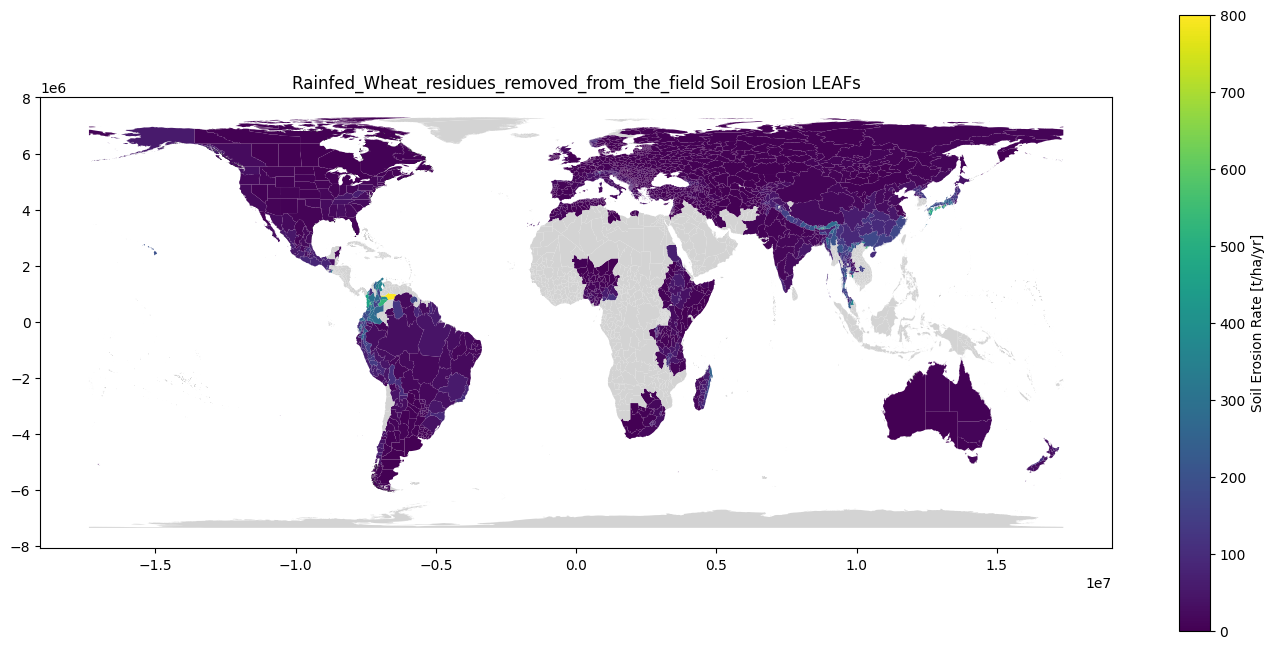

In [60]:
fig, ax = plt.subplots(figsize=(14, 8))
gdf_sc_testflow.plot(column="cf", ax=ax, cmap="viridis", legend=True, 
           legend_kwds={"label": "Soil Erosion Rate [t/ha/yr]", "shrink": 0.8}, 
           missing_kwds={"color": "lightgrey", "label": "No value"}
           ) 

ax.set_title("Rainfed_Wheat_residues_removed_from_the_field Soil Erosion LEAFs")
plt.tight_layout() 
plt.show()

Just Colombia, as it has high values compared to the rest

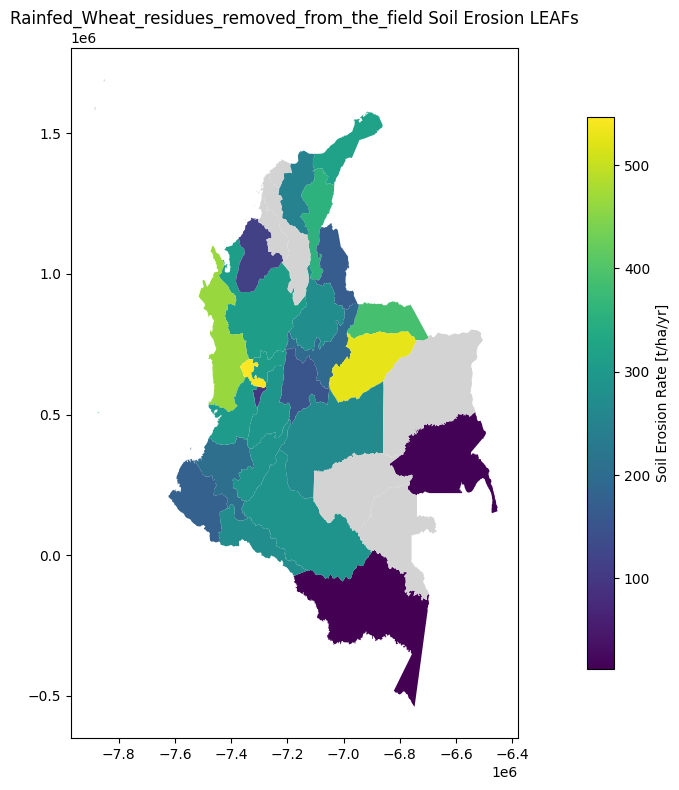

In [61]:
fig, ax = plt.subplots(figsize=(14, 8))
gdf_sc_testflow[gdf_sc_testflow["ADM0_NAME"] == "Colombia"].plot(column="cf", ax=ax, cmap="viridis", legend=True, 
           legend_kwds={"label": "Soil Erosion Rate [t/ha/yr]", "shrink": 0.8}, 
           missing_kwds={"color": "lightgrey", "label": "No value"}
           ) 

ax.set_title("Rainfed_Wheat_residues_removed_from_the_field Soil Erosion LEAFs")
plt.tight_layout() 
plt.show()

In [62]:
test_raster = "../LEAFs/soil_erosion/raster/se_rate_25km_Rainfed_Wheat_residues_removed_from_the_field.tif"

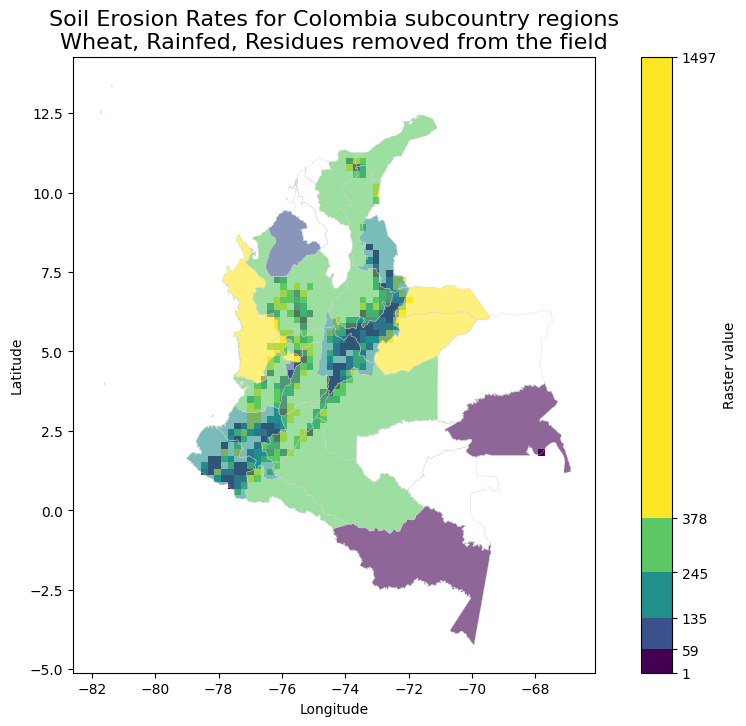

(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Soil Erosion Rates for Colombia subcountry regions\nWheat, Rainfed, Residues removed from the field'}, xlabel='Longitude', ylabel='Latitude'>)

In [ ]:
mp.plot_raster_over_gdf_showpolygonvalues(test_raster, gdf_sc_testflow[gdf_sc_testflow["ADM0_NAME"] == "Colombia"], title="Soil Erosion Rates for Colombia subcountry regions\nWheat, Rainfed, Residues removed from the field",polygon_linewidth=0.25, polygon_value_col="cf", match_color_scale=True, n_quantiles=5, alpha=1)

So it can be seen than the average worked fine. It can also be seen that the overlap in some regions is not large, and wheat production is concentrated in just a couple of strips, with averages going between 12 to 500 ton soil/ha/yr, comparing it witht he average of 252 that the country gives.

It can also be seen that very high-values in some regions are overlapped minimally, which highlight the need to favour LEAFs defined at a finer resolution than sub-countries for companies.

### 4.3 - Ecoregions

Finally, ecoregion averages are calculated